b0 = 1.06
b1 = 0.9927272727272727
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2.2, 3.1, 4.1, 5.0, 5.8, 6.9, 7.8, 9.0, 10.2, 11.1]
D1 = 0.02395454545454547
Fkr = 2.4470637479798225
D1 / S2 = 0.2395454545454547
Разница не значима, поправка не требуется
b0 = 1.06
b1 = 0.9927272727272727


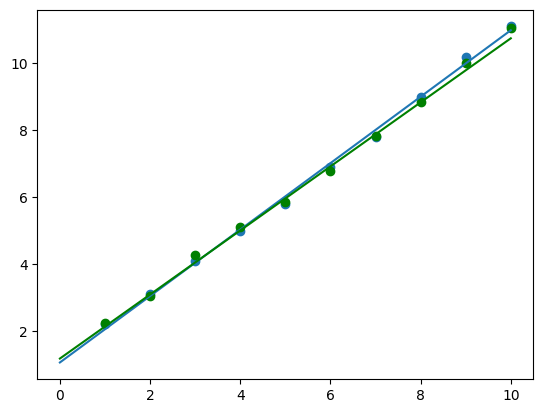

Fkr = 2.4470637479798225
D2 / S2 = 0.31845838049511277
Разница не значима, поправка не требуется


In [1]:
import random

import scipy.stats as sts
from matplotlib import pyplot as plt

# y = b0 + b1*x

xs = [i + 1 for i in range(10)]
ys = [2.2, 3.1, 4.1, 5.0, 5.8, 6.9, 7.8, 9.0, 10.2, 11.1]


# Задание 1
def count_b0(xs, ys):
    x2_sum = sum([x**2 for x in xs])
    yx_sum = sum([ys[i] * xs[i] for i in range(len(xs))])

    b0 = (sum(ys) * x2_sum - yx_sum * sum(xs)) / (len(xs) * x2_sum - sum(xs) * sum(xs))
    return b0


b0 = count_b0(xs, ys)
print("b0 = " + str(b0))


def count_b1(xs, ys):
    x2_sum = sum([x**2 for x in xs])
    yx_sum = sum([ys[i] * xs[i] for i in range(len(xs))])

    b1 = (sum(ys) * sum(xs) - len(xs) * yx_sum) / (sum(xs) * sum(xs) - len(xs) * x2_sum)
    return b1


b1 = count_b1(xs, ys)
print("b1 = " + str(b1))


def f(x):
    return b1 * x + b0


plt.scatter(xs, ys)
plt.plot([0, xs[-1]], [b0, xs[-1] * b1 + b0])
# plt.show()

# Задание 2
def count_D1(xs, ys):
    arr = [(ys[i] - f(xs[i]))**2 for i in range(len(xs))]
    return (1 / (len(xs) - 2)) * sum(arr)

print(xs)
print(ys)
D1 = count_D1(xs, ys)
print("D1 = " + str(D1))

# Задние 3

S2 = 0.1

Fkr = sts.f.ppf(0.95, len(xs) - 2, 20)
print("Fkr = " + str(Fkr))
print("D1 / S2 = " + str(D1 / S2))
bol = (D1 / S2) > Fkr
if bol:
    print("Разница значима")
else:
    print("Разница не значима, поправка не требуется")



# New ys

p = 0.05

def count_new_y(ys, k):
    new_ys = []
    for y in ys:
        num = random.random() * 2 - 1
        new_y = num * k + y
        new_ys.append(new_y)
    return new_ys

new_ys = count_new_y(ys, 0.2)

plt.scatter(xs, new_ys, color="g")

b02 = count_b0(xs, new_ys)
print("b0 = " + str(b0))
b12 = count_b1(xs, new_ys)
print("b1 = " + str(b1))
plt.plot([0, xs[-1]], [b02, xs[-1] * b12 + b0], color="g")

D2 = count_D1(xs, new_ys)
plt.show()


S2 = 0.1

Fkr = sts.f.ppf(0.95, len(xs) - 2, 20)
print("Fkr = " + str(Fkr))
print("D2 / S2 = " + str(D2 / S2))
bol = (D2 / S2) > Fkr
if bol:
    print("Разница значима")
else:
    print("Разница не значима, поправка не требуется")


